In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

In [8]:
AR2_Base = []
MAE_Base = []

Ridge_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridgecv= RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    ridgecv.fit(X_train_scaled, Y_train)
    
    ridge_best_alpha = Ridge(alpha=round(ridgecv.alpha_,2))
    ridge_best_alpha.fit(X_train_scaled, Y_train)
    Ridge_A_Score = ridge_best_alpha.score(X_test_scaled, Y_test)
    
    pred = ridge_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Ridge_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    Ridge_Alphas.append(ridgecv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Base.append(mae)    

In [9]:
Base = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})
Base

,AR2_Base,MAE_Base
0,0.848071,13699.116341
1,0.894607,14998.985271
2,0.856472,15115.594527
3,0.904695,14408.701612
4,0.888762,15077.349305
...,...,...
95,0.904888,14597.231830
96,0.842385,14599.232916
97,0.906417,14789.569521
98,0.898325,13753.324761


In [10]:
base_drop1 = pd.read_csv('BaseDrop1.csv')

In [11]:
base_drop1.shape

(2579, 300)

In [12]:
X2 = base_drop1.drop(['SalePrice'], axis=1).values
y2 = base_drop1.SalePrice.values

In [13]:
len(y2)

2579

In [14]:
X2.shape

(2579, 299)

In [15]:
X2.shape[1]

299

In [16]:
AR2_Drop1 = []
MAE_Drop1 = []

Ridge_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X2,y2,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridgecv= RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    ridgecv.fit(X_train_scaled, Y_train)
    
    ridge_best_alpha = Ridge(alpha=round(ridgecv.alpha_,2))
    ridge_best_alpha.fit(X_train_scaled, Y_train)
    Ridge_A_Score = ridge_best_alpha.score(X_test_scaled, Y_test)
    
    pred = ridge_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Ridge_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    Ridge_Alphas.append(ridgecv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)    

In [17]:
BaseDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,0.929502,13253.850847
1,0.911997,14402.361645
2,0.901982,14379.479187
3,0.909549,14381.584262
4,0.917299,13498.922990
...,...,...
95,0.907363,13915.476407
96,0.911387,14326.523849
97,0.903709,15186.075902
98,0.901421,15133.585785


In [20]:
base_drop_IF = pd.read_csv('BaseDropIF.csv')

In [21]:
base_drop_IF.shape

(2567, 299)

In [22]:
X3 = base_drop_IF.drop(['SalePrice'], axis=1).values
y3 = base_drop_IF.SalePrice.values

In [23]:
AR2_DropIF = []
MAE_DropIF = []

Ridge_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridgecv= RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    ridgecv.fit(X_train_scaled, Y_train)
    
    ridge_best_alpha = Ridge(alpha=round(ridgecv.alpha_,2))
    ridge_best_alpha.fit(X_train_scaled, Y_train)
    Ridge_A_Score = ridge_best_alpha.score(X_test_scaled, Y_test)
    
    pred = ridge_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Ridge_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    Ridge_Alphas.append(ridgecv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)    


In [24]:
BaseDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
BaseDropIF

,AR2_DropIF,MAE_DropIF
0,0.909171,13883.267910
1,0.912387,13398.081751
2,0.919894,14323.320257
3,0.922587,13325.447639
4,0.891706,15124.496874
...,...,...
95,0.893619,15290.425828
96,0.913866,13732.648380
97,0.913939,14189.358423
98,0.913543,14083.110798


In [25]:
box = pd.concat([Base, BaseDrop1, BaseDropIF], axis=1)
box

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.848071,13699.116341,0.929502,13253.850847,0.909171,13883.267910
1,0.894607,14998.985271,0.911997,14402.361645,0.912387,13398.081751
2,0.856472,15115.594527,0.901982,14379.479187,0.919894,14323.320257
3,0.904695,14408.701612,0.909549,14381.584262,0.922587,13325.447639
4,0.888762,15077.349305,0.917299,13498.922990,0.891706,15124.496874
...,...,...,...,...,...,...
95,0.904888,14597.231830,0.907363,13915.476407,0.893619,15290.425828
96,0.842385,14599.232916,0.911387,14326.523849,0.913866,13732.648380
97,0.906417,14789.569521,0.903709,15186.075902,0.913939,14189.358423
98,0.898325,13753.324761,0.901421,15133.585785,0.913543,14083.110798


In [26]:
box.describe()

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.881119,14689.983643,0.909639,14318.678669,0.913002,14103.816548
std,0.031831,660.915687,0.009632,510.435462,0.009412,548.229166
min,0.792888,12601.173241,0.885913,12985.763637,0.884764,12851.440892
25%,0.854410,14240.930627,0.903666,13959.218819,0.905990,13751.350050
50%,0.892133,14745.089293,0.910788,14317.276252,0.914166,14044.588930
75%,0.906960,15126.774219,0.916363,14627.736237,0.920048,14427.330048
max,0.927755,16202.992663,0.931375,15575.986177,0.929689,15544.439104


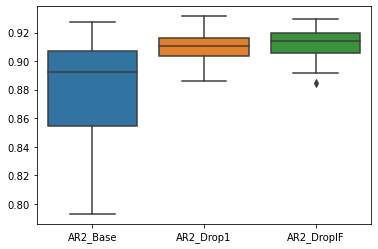

In [27]:
sns.boxplot(data=box[['AR2_Base','AR2_Drop1', 'AR2_DropIF']]);

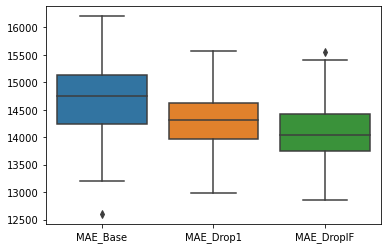

In [28]:
sns.boxplot(data=box[['MAE_Base', 'MAE_Drop1', 'MAE_DropIF']]);